In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as py

%pylab inline

data_name = 'results.csv'

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv(data_name)
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ


In [3]:
df.isnull().sum()

Id              0
Title           0
Body            0
Tags            0
CreationDate    0
Y               0
dtype: int64

In [4]:
df.isna().sum()

Id              0
Title           0
Body            0
Tags            0
CreationDate    0
Y               0
dtype: int64

In [5]:
def get_keywords(tag):
    if(not tag): return tag
    
    tag = tag.replace('><', ',')
    tag = tag.replace('<', '')
    tag = tag.replace('>', '')
    
    return tag

def to_list(my_keywords):
    return my_keywords.split(",")

df['Keywords'] = df['Tags'].apply(get_keywords)
temp_df = df['Tags'].apply(get_keywords).apply(to_list)
df.head()

,Id,Title,Body,Tags,CreationDate,Y,Keywords
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,"java,repeat"
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,"sql,sql-server"
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,"java,optional"
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,"javascript,image,overlay,react-native,opacity"
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"swift,operators,whitespace,ternary-operator,op..."


In [6]:
import re

def remove_tags(post):
    if not post: return post
    
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', post)
    return cleantext

df['Body'] = df['Body'].apply(remove_tags)
df.head()

,Id,Title,Body,Tags,CreationDate,Y,Keywords
0,34552656,Java: Repeat Task Every Random Seconds,I'm already familiar with repeating tasks ever...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,"java,repeat"
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,"sql,sql-server"
2,34553034,Why are Java Optionals immutable?,I'd like to understand why Java 8 Optionals we...,<java><optional>,2016-01-01 02:03:20,HQ,"java,optional"
3,34553174,Text Overlay Image with Darkened Opacity React...,I am attempting to overlay a title over an ima...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,"javascript,image,overlay,react-native,opacity"
4,34553318,Why ternary operator in swift is so picky?,"The question is very simple, but I just could ...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"swift,operators,whitespace,ternary-operator,op..."


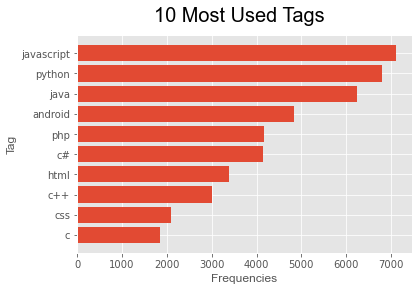

In [7]:
from itertools import chain 
from collections import Counter

csfont = {'fontname':'Arial'}
figsize(6, 4)
py.style.use('ggplot')

freq = Counter(list(chain.from_iterable(temp_df.to_list())))
freq_df = pd.DataFrame(freq.items(), columns=['Tag', 'Frequencies']).sort_values(by='Frequencies', ascending=False)

top_10 = freq_df.head(10).sort_values(by='Frequencies', ascending=True)

py.figure().suptitle('10 Most Used Tags', fontsize='20', **csfont)
py.barh(top_10['Tag'], top_10['Frequencies'], align='center')
py.ylabel('Tag', fontsize='12', **csfont)
py.xlabel('Frequencies', fontsize='12', **csfont)
plt.savefig('./Plots/most used tags.png', dpi=300, bbox_inches='tight')

py.show()

In [8]:
df['CreationYear'] =df['CreationDate'].str[0:4]
df['CreationYear'] = df['CreationYear'].astype('int32')

df.head()

,Id,Title,Body,Tags,CreationDate,Y,Keywords,CreationYear
0,34552656,Java: Repeat Task Every Random Seconds,I'm already familiar with repeating tasks ever...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,"java,repeat",2016
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,"sql,sql-server",2016
2,34553034,Why are Java Optionals immutable?,I'd like to understand why Java 8 Optionals we...,<java><optional>,2016-01-01 02:03:20,HQ,"java,optional",2016
3,34553174,Text Overlay Image with Darkened Opacity React...,I am attempting to overlay a title over an ima...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,"javascript,image,overlay,react-native,opacity",2016
4,34553318,Why ternary operator in swift is so picky?,"The question is very simple, but I just could ...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"swift,operators,whitespace,ternary-operator,op...",2016


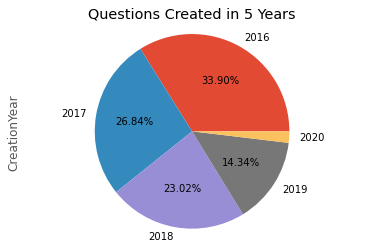

In [9]:
def autopct_(pct): # only show the label when it's > 10%
    return ('%.2f%%' % pct) if pct > 10 else ''

df.CreationYear.value_counts().plot(kind='pie', autopct=autopct_)
py.axis('equal')
py.title('Questions Created in 5 Years')
plt.savefig('./Plots/questions created in 5 years.png', dpi=300, bbox_inches='tight')

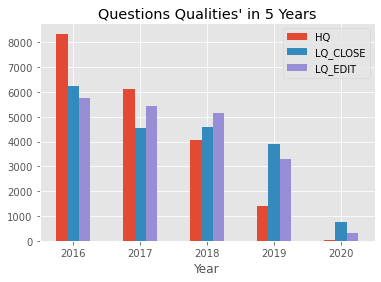

In [10]:
year_quality = pd.DataFrame()

for year in range(2016, 2021):
    newdf = pd.DataFrame(df[df['CreationYear']==year]['Y'].value_counts()).transpose()
    newdf.reset_index(inplace = True)
    newdf.drop(columns=['index'], inplace=True)
    newdf.insert(0, "Year", int(year), True) 
    
    year_quality = pd.concat([year_quality, newdf])

year_quality.set_index('Year', inplace=True)
ax = year_quality.plot.bar(title = 'Questions Qualities\' in 5 Years', rot=0)
plt.savefig('./Plots/questions qualities\' in 5 years.png', dpi=300, bbox_inches='tight')